# Credit Card Fraud Detection
> Anonymized credit card transactions labeled as fraudulent or genuine

- toc: false
- badges: true
- comments: true
- categories: [titanic, kaggle]
- author: Lucas Tiago
- image: 

In [60]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN
from imblearn.over_sampling import KMeansSMOTE, SMOTE, ADASYN, BorderlineSMOTE, SMOTENC


import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv(r"C:\Users\lucas\Documents\lucastiagooliveira\dados\transation_creditcard\creditcard.csv")

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [65]:
fraud = df.loc[df.Class == 1]
non_fraud = df.loc[df.Class == 0]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

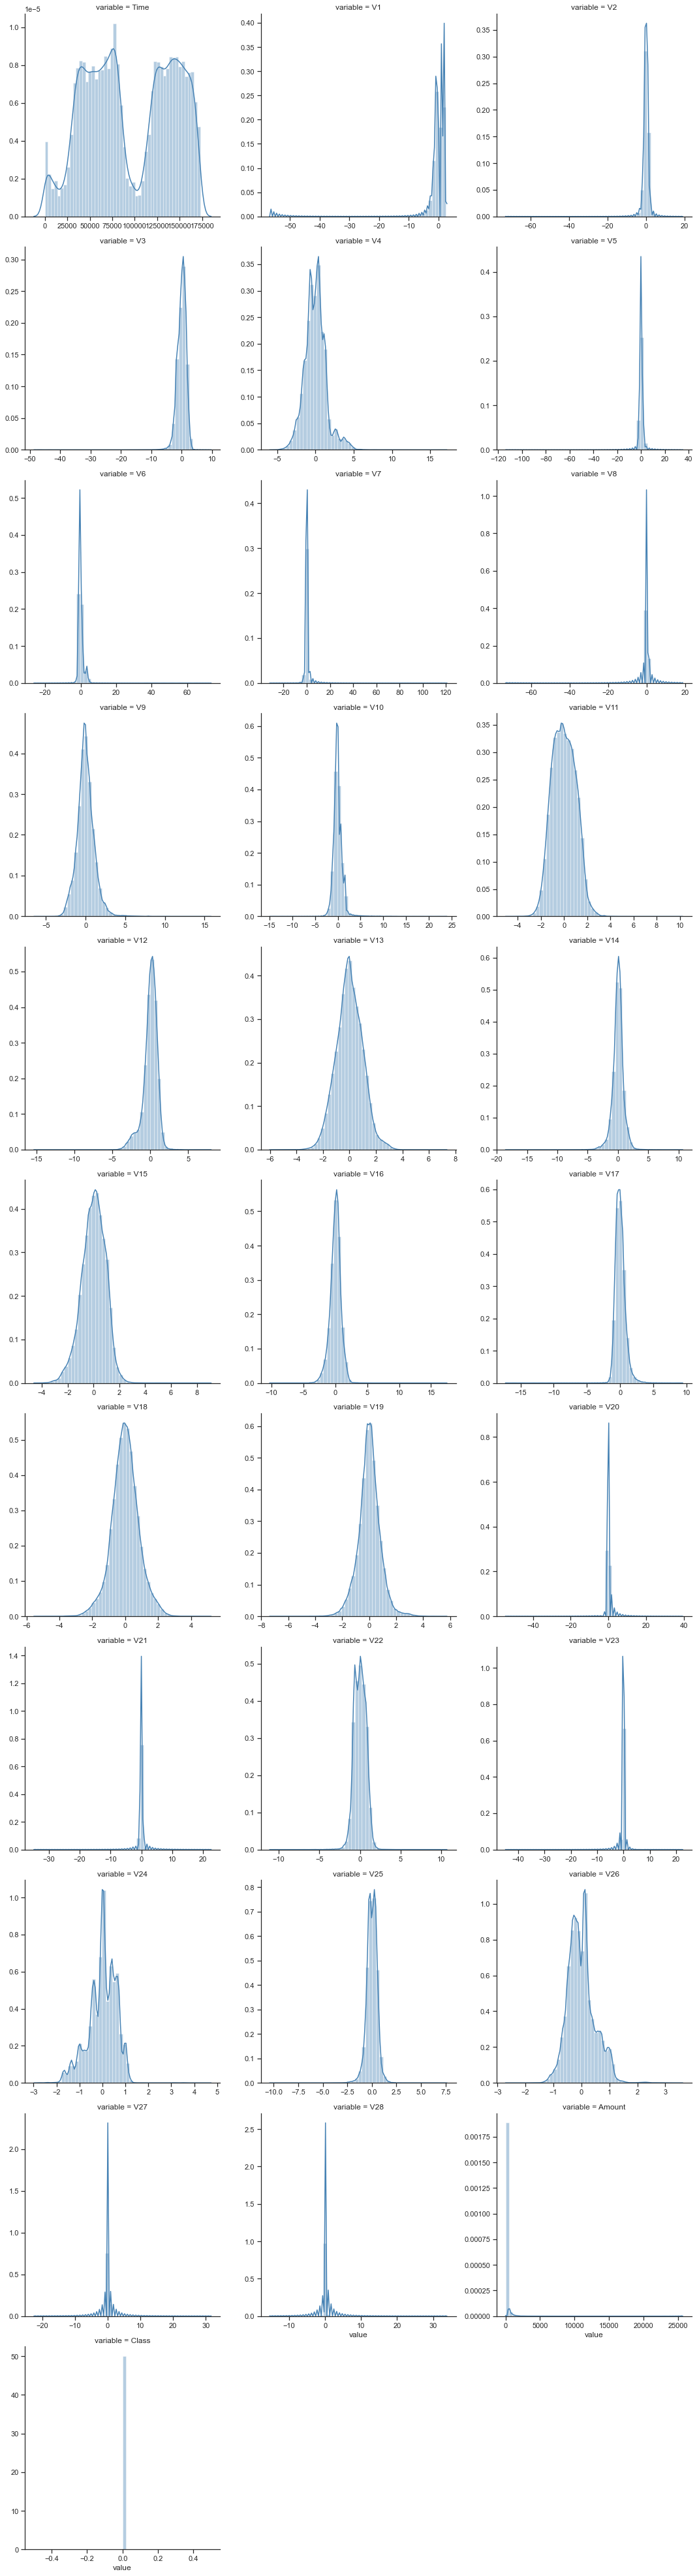

In [66]:
sns.set(style="ticks")

melted = pd.melt(non_fraud, value_vars= df.columns)

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 3, sharex = False, sharey = False, height = 5)

g.map(sns.distplot, "value", color="steelblue")

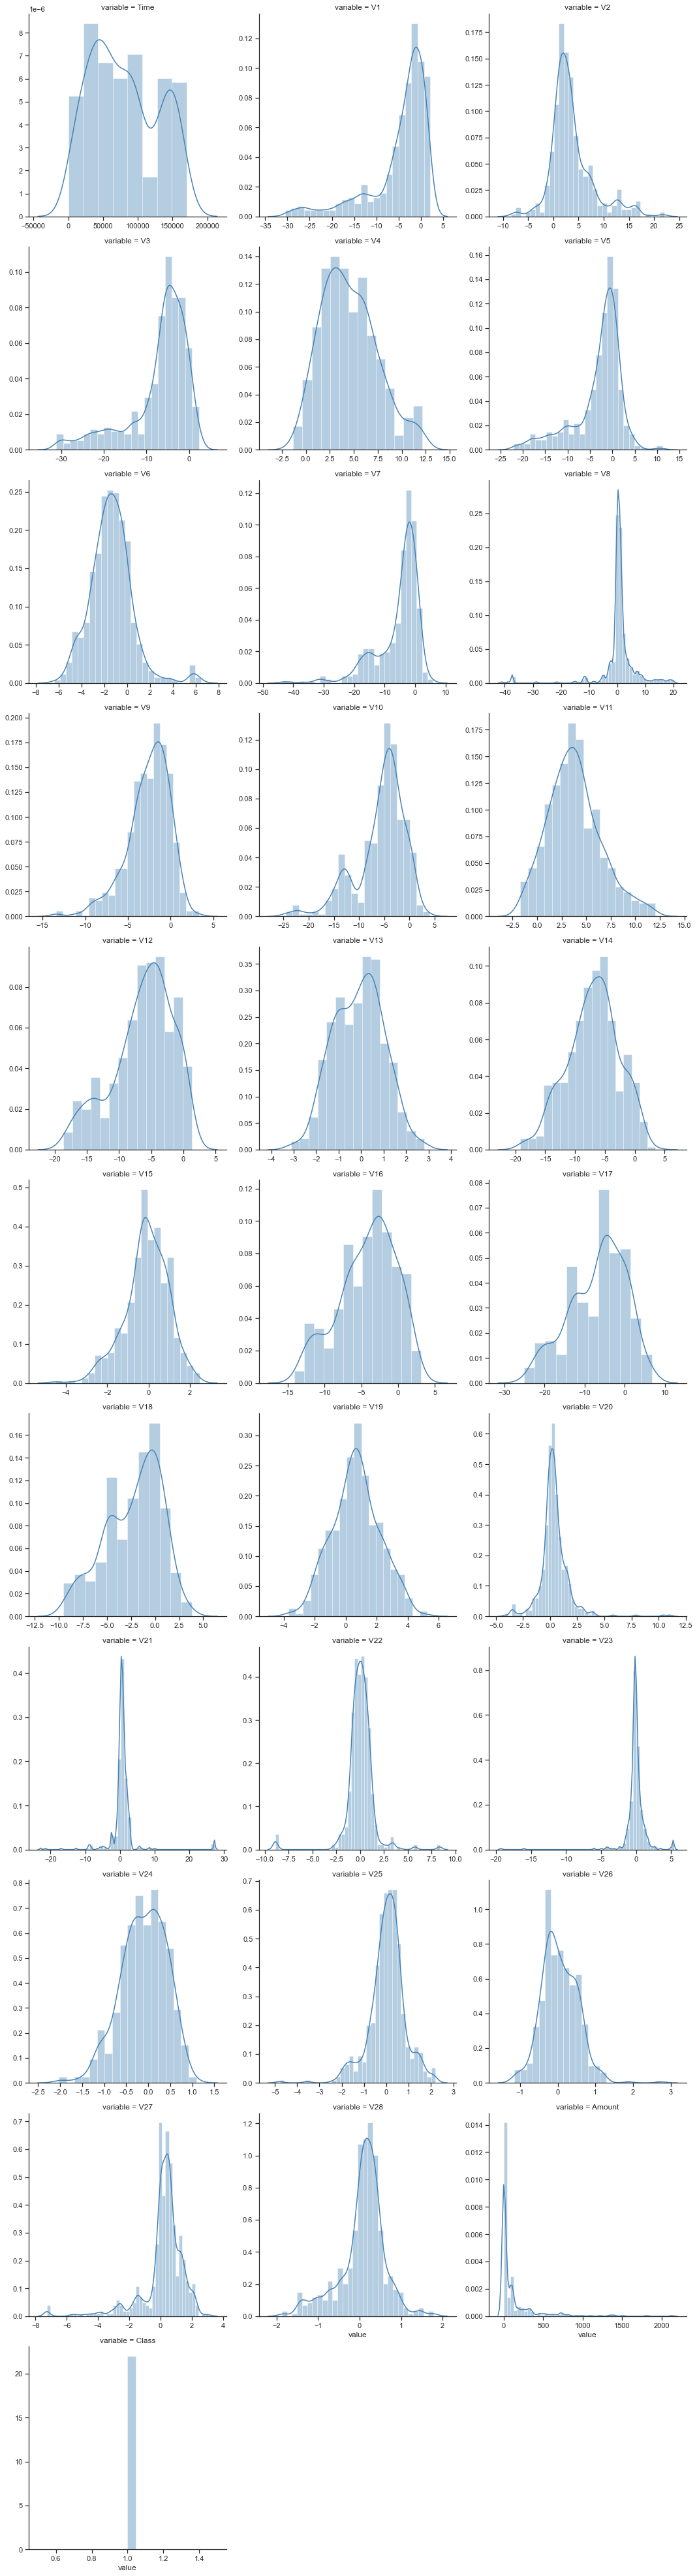

In [67]:
sns.set(style="ticks")

melted = pd.melt(fraud, value_vars= df.columns)

g = sns.FacetGrid(melted, col = 'variable', margin_titles=True, col_wrap = 3, sharex = False, sharey = False, height = 5)

g.map(sns.distplot, "value", color="steelblue")

In [68]:
#Calculate the skewness and kurtosis:
# col = list(df.columns)
# col.remove('Class'), col.remove('Time')
# skew, kurt= [], []

# for i in col:
#     skew.append(fraud[i].skew())

# fraud_sk = pd.DataFrame({"Variable":col,
#                          'Skewness':skew,
#                          'Kurtosis':kurt})
# fraud_sk

In [69]:
#Calculate the skewness and kurtosis:
cor_class = df.corr()[['Class']].sort_values('Class', ascending=False)
cor_class

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


## Criando dados de treino e test

In [70]:
y = df.pop("Class")
X = df

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

## Oversampling

In [91]:
res = BorderlineSMOTE()
X_train_resampled, y_train_resampled = res.fit_resample(X_train, y_train)

In [92]:
len(y_train_resampled[y_train_resampled == 0]), len(y_train_resampled[y_train_resampled == 1])

(227448, 227448)

In [93]:
X_train_resampled.shape

(454896, 30)

## Separação dos dados de treino e validação

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.2)

## Modelo

### Regressão Logística

In [20]:
log_regr = LogisticRegression(random_state = 0)


In [22]:
param_grid = {'tol': [1e-4,1e-5,1e-6],
              'C': [0.5,0.6,0.7,0.8,0.9,0.95]
}

clf = GridSearchCV(log_regr, param_grid).fit(X_train_resampled, y_train_resampled)

In [23]:
clf.best_params_

{'C': 0.6, 'tol': 0.0001}

In [94]:
log_regr = LogisticRegression(random_state = 0, C = 0.6, tol = 1e-4).fit(X_train_resampled, y_train_resampled)

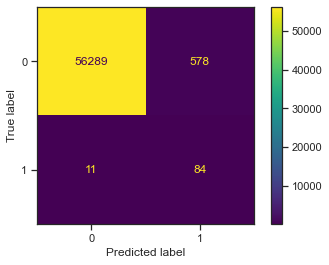

In [95]:
plot_confusion_matrix(log_regr, X_test, y_test)
plt.show()

In [96]:
f1_score(y_test, log_regr.predict(X_test))

0.22192866578599735

### Arvore de decisão

In [97]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)

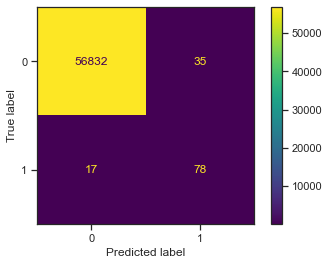

In [98]:
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

In [99]:
f1_score(y_test, tree.predict(X_test))

0.7499999999999999

### Random Florest

In [100]:
forest = RandomForestClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)

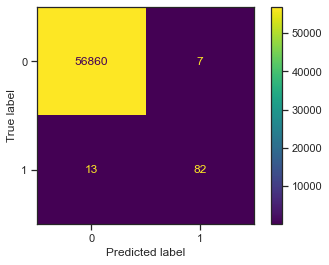

In [101]:
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

In [102]:
f1_score(y_test, forest.predict(X_test))

0.891304347826087

In [103]:
forest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)